In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
%matplotlib inline
sns.set()

In [2]:
def read_file(file):
  x = open(file,'r',encoding='utf-8')
  y = x.read()
  content = y.splitlines()
  return content

file_dir = r'..\data\raw_fixed\realtime\\0\f = 6 Hz.txt'
file = read_file(file_dir)

In [3]:
tables = []
table = []
n_row = len(file)

for i in range(1,n_row):
    if file[i] != '':
        table.append(file[i].split('\t'))
    else:
        tables.append(table)
        table = []
tables.append(table)

print('Number of tables : {:}'.format(len(tables)))

Number of tables : 128


In [4]:
info = []
data = []
data_name = []

for i in range(len(tables)):
    if i%2==0:
        info.append(tables[i])
    else:
        data_name.append(tables[i][0])
        data.append(tables[i][1:])
        
exp = {'info':info, 'data':data, 'data_name':data_name}

In [5]:
exp['info']

[[['Experiment #1 begin '],
  ['- freq    = 6.00 Hz'],
  ['- rho_int = 700.00 kg/m3'],
  ['- rho_bed = 700.00 kg/m3']],
 [['Experiment #2 begin '],
  ['- freq    = 6.00 Hz'],
  ['- rho_int = 800.00 kg/m3'],
  ['- rho_bed = 700.00 kg/m3']],
 [['Experiment #3 begin '],
  ['- freq    = 6.00 Hz'],
  ['- rho_int = 900.00 kg/m3'],
  ['- rho_bed = 700.00 kg/m3']],
 [['Experiment #4 begin '],
  ['- freq    = 6.00 Hz'],
  ['- rho_int = 1000.00 kg/m3'],
  ['- rho_bed = 700.00 kg/m3']],
 [['Experiment #5 begin '],
  ['- freq    = 6.00 Hz'],
  ['- rho_int = 1100.00 kg/m3'],
  ['- rho_bed = 700.00 kg/m3']],
 [['Experiment #6 begin '],
  ['- freq    = 6.00 Hz'],
  ['- rho_int = 1200.00 kg/m3'],
  ['- rho_bed = 700.00 kg/m3']],
 [['Experiment #7 begin '],
  ['- freq    = 6.00 Hz'],
  ['- rho_int = 1300.00 kg/m3'],
  ['- rho_bed = 700.00 kg/m3']],
 [['Experiment #8 begin '],
  ['- freq    = 6.00 Hz'],
  ['- rho_int = 1400.00 kg/m3'],
  ['- rho_bed = 700.00 kg/m3']],
 [['Experiment #9 begin '],
  ['- f

In [6]:
exp_number = 45

df = pd.DataFrame(exp['data'][exp_number], columns= exp['data_name'][exp_number])
df = df.astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t(s)    179 non-null    float64
 1   cont    179 non-null    float64
 2   z_int   179 non-null    float64
 3   E_pot   179 non-null    float64
dtypes: float64(4)
memory usage: 5.7 KB


## Plot

In [7]:
rolling_number = 10

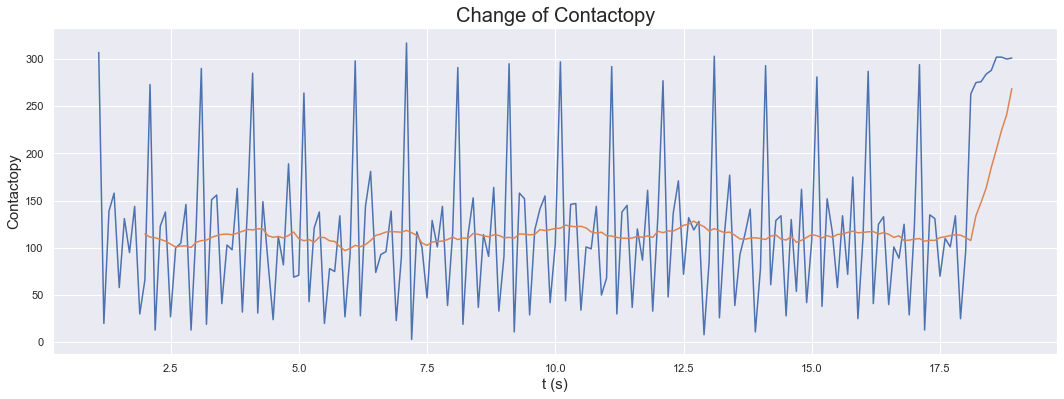

In [8]:
fig_title = 'Change of Contactopy'

plt.figure(figsize=(18,6))
sns.lineplot(data=df, x='t(s)', y='cont')

df['cont_rolavg'] = df['cont'].rolling(rolling_number).mean()
sns.lineplot(data=df, x='t(s)', y='cont_rolavg')

plt.title(fig_title, fontsize=20)
plt.xlabel('t (s)', fontsize=15)
plt.ylabel('Contactopy', fontsize=15)

plt.show()

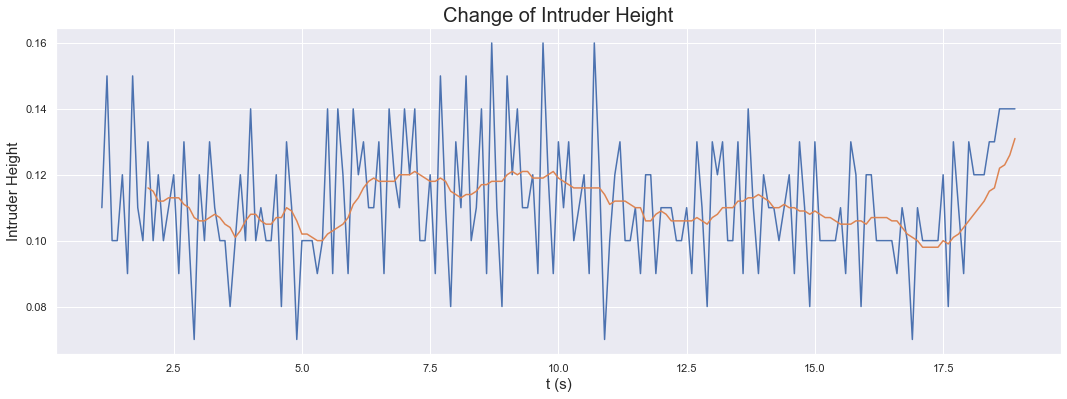

In [9]:
fig_title = 'Change of Intruder Height'

plt.figure(figsize=(18,6))
sns.lineplot(data=df, x='t(s)', y='z_int')

df['zint_rolavg'] = df['z_int'].rolling(rolling_number).mean()
sns.lineplot(data=df, x='t(s)', y='zint_rolavg')

plt.title(fig_title, fontsize=20)
plt.xlabel('t (s)', fontsize=15)
plt.ylabel('Intruder Height', fontsize=15)
#plt.savefig(fig_dir+fig_title+'.png', dpi=300, bbox_inches='tight', facecolor='w')
plt.show()

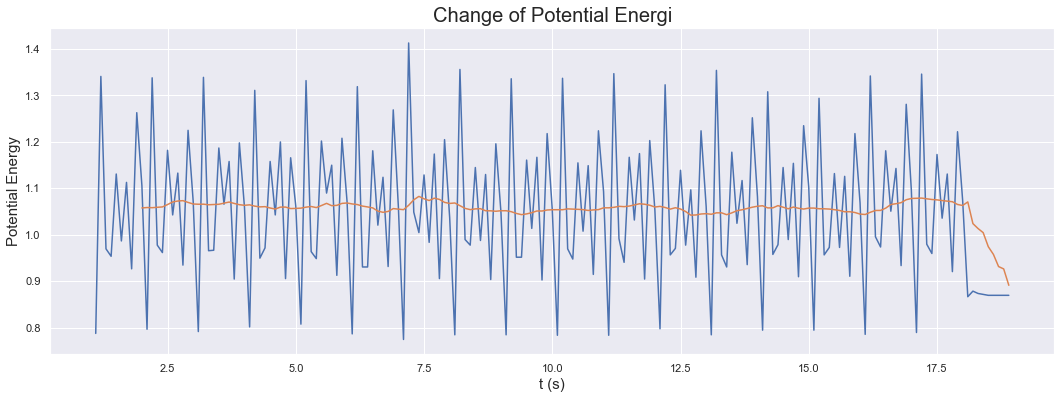

In [10]:
fig_title = 'Change of Potential Energi'

plt.figure(figsize=(18,6))
sns.lineplot(data=df, x='t(s)', y='E_pot')

df['Ep_rolavg'] = df['E_pot'].rolling(rolling_number).mean()
sns.lineplot(data=df, x='t(s)', y='Ep_rolavg')

plt.title(fig_title, fontsize=20)
plt.xlabel('t (s)', fontsize=15)
plt.ylabel('Potential Energy', fontsize=15)
#plt.savefig(fig_dir+fig_title+'.png', dpi=300, bbox_inches='tight', facecolor='w')
plt.show()

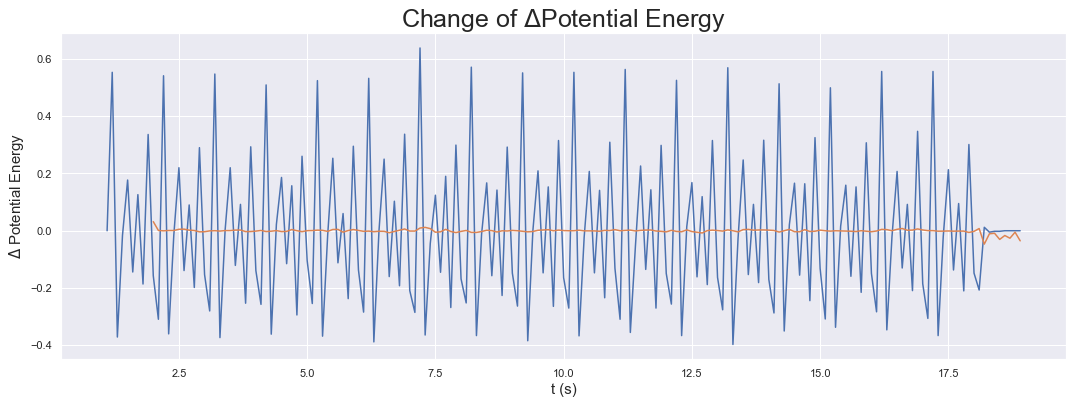

In [11]:
fig_title = 'Change of $\Delta$Potential Energy'

delta_Ep = []
for i in range(0,len(df)):
    if i==0:
        delta = 0
    else:
        delta = df.E_pot[i] - df.E_pot[i-1]
    delta_Ep.append(delta)
    
df['delta_Ep'] = delta_Ep

plt.figure(figsize=(18,6))
sns.lineplot(data=df, x='t(s)', y='delta_Ep')

df['deltaEp_rolavg'] = df['delta_Ep'].rolling(rolling_number).mean()
sns.lineplot(data=df, x='t(s)', y='deltaEp_rolavg')

plt.title(fig_title, fontsize=25)
plt.xlabel('t (s)', fontsize=15)
plt.ylabel('$\Delta$ Potential Energy', fontsize=15)

plt.show()